In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)


df.head()
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

Text(0.5, 1.0, 'Gender Distribution')

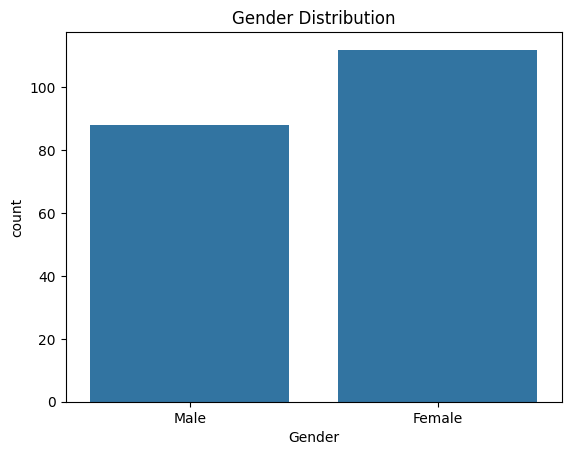

In [15]:
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')


Text(0.5, 1.0, 'Age Distribution')

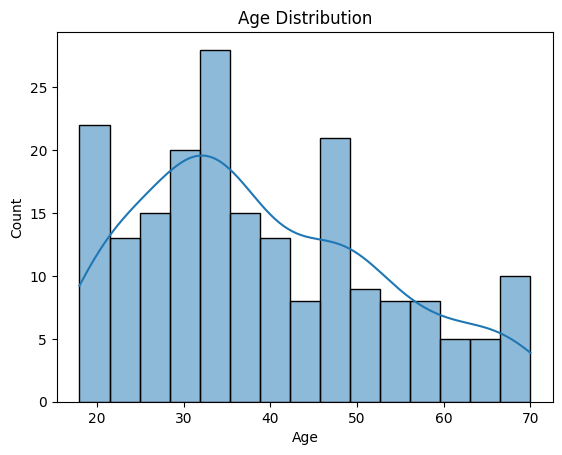

In [16]:
sns.histplot(df['Age'], kde=True, bins=15)
plt.title('Age Distribution')


Text(0.5, 1.0, 'Income vs Spending Score')

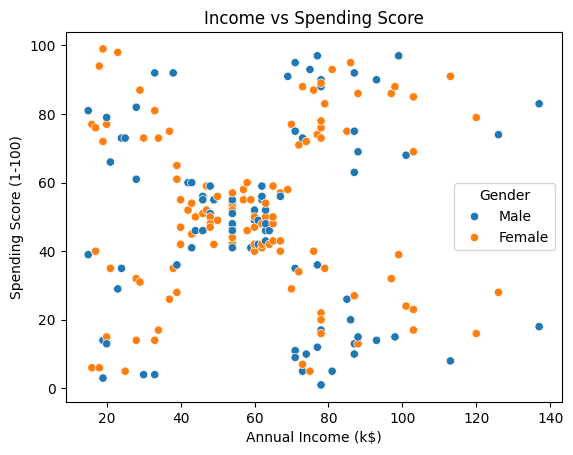

In [17]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Income vs Spending Score')


In [18]:
from sklearn.preprocessing import StandardScaler

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


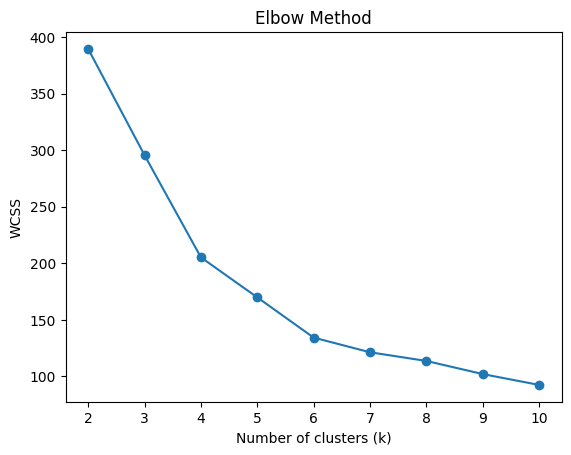

In [19]:
from sklearn.cluster import KMeans

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [20]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    print(k, silhouette_score(X_scaled, labels))


2 0.33547192894004574
3 0.3579234303882264
4 0.4039582785148566
5 0.40846873777345605
6 0.43106526216603014
7 0.410091114520974
8 0.3673663165322295
9 0.37442148555078425
10 0.36186970479722974


In [21]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


Text(0.5, 1.0, 'Customer Segments by K-Means')

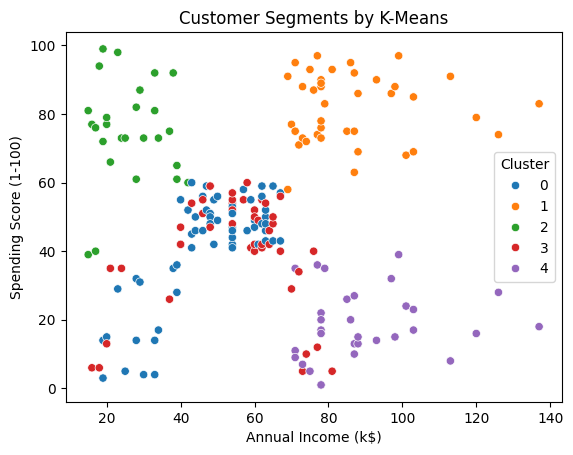

In [22]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10')
plt.title('Customer Segments by K-Means')


In [23]:

df.rename(columns={
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)

summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual_Income': ['mean', 'min', 'max'],
    'Spending_Score': ['mean', 'min', 'max']
}).round(2)

summary['Gender_mode'] = df.groupby('Cluster')['Gender'].apply(lambda x: x.mode()[0]).values

summary


Age         Annual_Income          Spending_Score          \
          mean min max          mean min  max           mean min max   
Cluster                                                                
0        55.28  40  70         47.62  19   67          41.71   3  60   
1        32.88  27  40         86.10  69  137          81.53  58  97   
2        25.77  18  35         26.12  15   42          74.85  39  99   
3        26.73  18  40         54.31  16   81          40.91   5  60   
4        44.39  32  59         89.77  71  137          18.48   1  39   

        Gender_mode  
                     
Cluster              
0            Female  
1            Female  
2            Female  
3            Female  
4              Male